In [1]:
#this is the new file

<b><font color ='red'><h4> Evaluation metrics overview </h4></font></b>


In this we will look at if 80% is good or not and other metrics that help in gauging a more information about the classification models and their accuracies


In [2]:
#lets import the code from previous part that will help us to achieve the learnings for this module

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ','_')

Categorical_columns = list(df.dtypes[df.dtypes=='object'].index)

for c in Categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')
    
df.totalcharges = pd.to_numeric(df.totalcharges,errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn=(df.churn=='yes').astype(int)


In [5]:
df_full_train,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_full_train,test_size=0.25,random_state=1)

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

y_train=df_train.churn.values
y_val= df_val.churn.values
y_test=df_test.churn.values


del df_train['churn']
del df_val['churn']
del df_test['churn']


In [6]:
numerical=['tenure','monthlycharges','totalcharges']
categorical= [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [7]:
dv=DictVectorizer(sparse=False)
X_train=dv.fit_transform(df_train[categorical+numerical].to_dict(orient='records'))

model = LogisticRegression()
model.fit(X_train,y_train)


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
X_val=dv.transform(df_val[categorical+numerical].to_dict(orient='records'))  # do not do fit transform again as we have already fitted the dict vectorizer so the number and columns are defined we just need to now transfrom the data as per the column information that we have

y_pred=model.predict_proba(X_val)[:,1]
churn_decision=(y_pred>=0.5)
(y_val==churn_decision).mean()

np.float64(0.8026969481902059)

In [9]:
# we have imported the code from the previous chapter now we can bulid the code for this chapter over and above this one.
len(y_val)

1409

<b><font color ='red'><h4> Accuracy and Dummy Model </h4></font></b>

😶Evaluate the model on different thresholds
😶Check the accuracy of dummy baselines

In [10]:
# lets take a look for how many customers did our model predict correctly
(y_val==churn_decision).sum()

#Hence we calculated the correct results for 1131 customers out of 1409 that is 80% accuracy 
#Accuracy tells us about the fraction of the correct prediction

np.int64(1131)

In [11]:
# now instead of 0.5 lets try to move the threshold and see how that impacts out model accuracy

thresholds=np.linspace(0,1,21)

score=[]

for t in thresholds:
    churn_decision=(y_pred>=t)
    acc=(y_val==churn_decision).mean()
    print('%.2f %.3f' % (t,acc))  # this means that only two decimal visible for t and 3 decimal for acc
    score.append(acc)

0.00 0.274
0.05 0.508
0.10 0.591
0.15 0.666
0.20 0.709
0.25 0.737
0.30 0.760
0.35 0.773
0.40 0.785
0.45 0.792
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


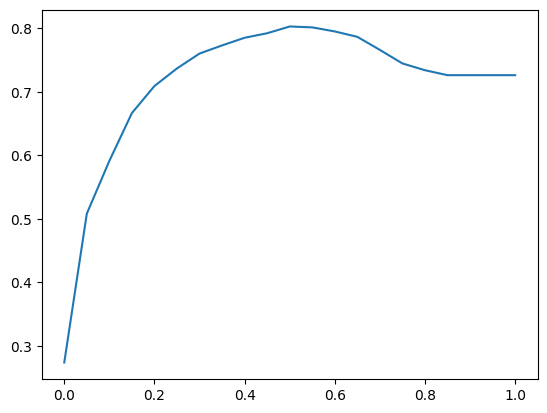

In [12]:
plt.plot(thresholds,score)


In [13]:
# Turns out that for this problme indeed 0.5 is the best threshold

In [14]:
# here we have implemented our own function to calculate the accuracy that is the line where we are calcualtin the mean but we do not have to do that since sklearn provides the accuracy score 

from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_val,churn_decision)

# Here it is using the churn decision from the last itetration

0.7260468417317246

In [16]:
# but we can do it this way to see the accuracy score
accuracy_score(y_val,y_pred>=0.5)

0.8026969481902059

In [17]:
# Now we need to see what is happening when the t is 1 since the values can not be greater that 1 hence there the values are 72%
y_pred>=1

# each element is false

array([False, False, False, ..., False, False, False])

In [18]:
accuracy_score(y_val,y_pred==1)

#this means that if we take the threshold as 1 still the model gives an accuracy of 72% then why do we even need to bother with this model. as in if we assume that everybodu is not churning then still we will get 72% accuracy
#our model is just making it 7% accurate.
# and this is the reason that accuracy is not the correct indicator.


0.7260468417317246

to count the values (in this case how many are true and how many are false) we can import counter from collection since this is a special collection.

In [19]:
from collections import Counter

In [20]:
Counter(y_pred>=1) # gives us the only the false values are there and that is 1409 

#so if we take the threshold more than 1 then our model is saying to us that relax nobody is going to churn.

Counter({np.False_: 1409})

In [21]:
#the reason that this is happening that the accuracy is 72% is lets take a look at our target variable.

y_val.mean()

# this means that 27% are churning. ie. these are the ones that have value in the target varibale as 1

np.float64(0.2739531582682754)

In [22]:
1-y_val.mean()

# this is the axact value that we are getting. so if we predict that nobody is churning still the accuracy will be 72% and the model can say for the rest 27% that churn that oops I made a mistake.

np.float64(0.7260468417317246)

In our case since there are 72% people that are not churning and 27% are churning hence this causing what is called

<font color ='red'> Class Imbalance </font>

Hence in such cases the accuracy will anyhow always be good. Hence the accuracy score in case of class Imbalace is misleading




<b><font color ='red'><h4> Confusion Table</h4></font></b>
😶Different types of erroes and correct decision <br>
😶Arranging them in table

In [23]:
#Now lets implement this in numpy
t=0.5
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

true_positive = (predict_positive & actual_positive).sum() # here instead of ==, & operator will be used since the arrays are true and false hence we can only use the bitwise operator
true_negative = (predict_negative & actual_negative).sum()

false_positive = (predict_positive & actual_negative).sum()
false_negative = (predict_negative & actual_positive).sum()

print("t has the value of :",t,true_positive,true_negative,false_positive,false_negative)


t has the value of : 0.5 210 921 102 176


This is how we put these values in the confusion matrix <br>

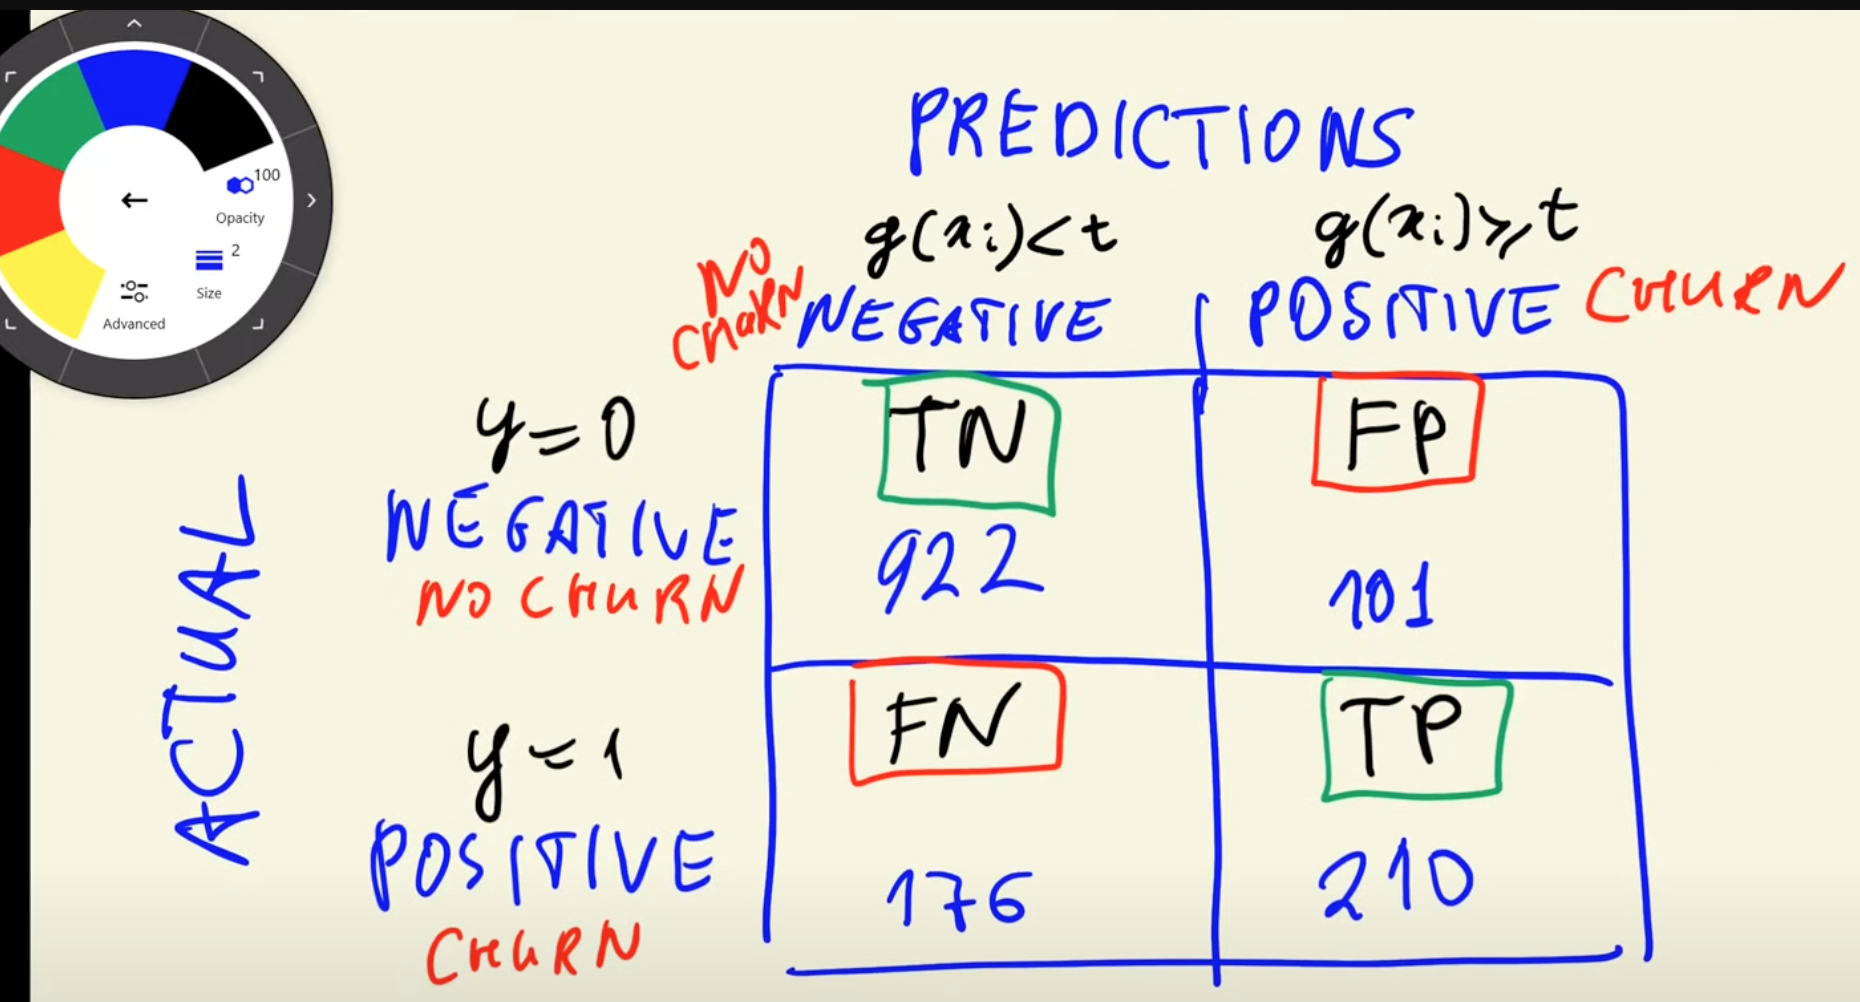

In [24]:
confusion_matrix = np.array([
    [true_negative,false_positive],
    [false_negative,true_positive]
])
confusion_matrix

array([[921, 102],
       [176, 210]])

Here we see that the false negative are more than false positive.<br>
The false positive are the people that are not going to churn but will still get the promotional email.<br>
The false Negative are the people that are going to churn but we predicted they are not goin to churn hence we were not able to retain them hence loss of profits.<br>

Hence we that there are two types of error and the the false negative are more harder to catch compared to false positive.

<br>we can also normalize them i.e in terms of percentage




In [25]:
(confusion_matrix/confusion_matrix.sum()).round(2) #due to rounding the sum is not comig up to be 100 of all the 4 elements

array([[0.65, 0.07],
       [0.12, 0.15]])

Hence this is telling us that what kinds of correct decision our model is making and what type of incorrect decision our model is making

<font color = 'red'> Using the confusition matrix(like precison and recall and then ROC Curve), we can derive many more matrix that can be used to determine the quality of model </font>





<b><font color ='red'><h4> Precision and Recall</h4></font></b>


<font color = 'red'> Precision </font>

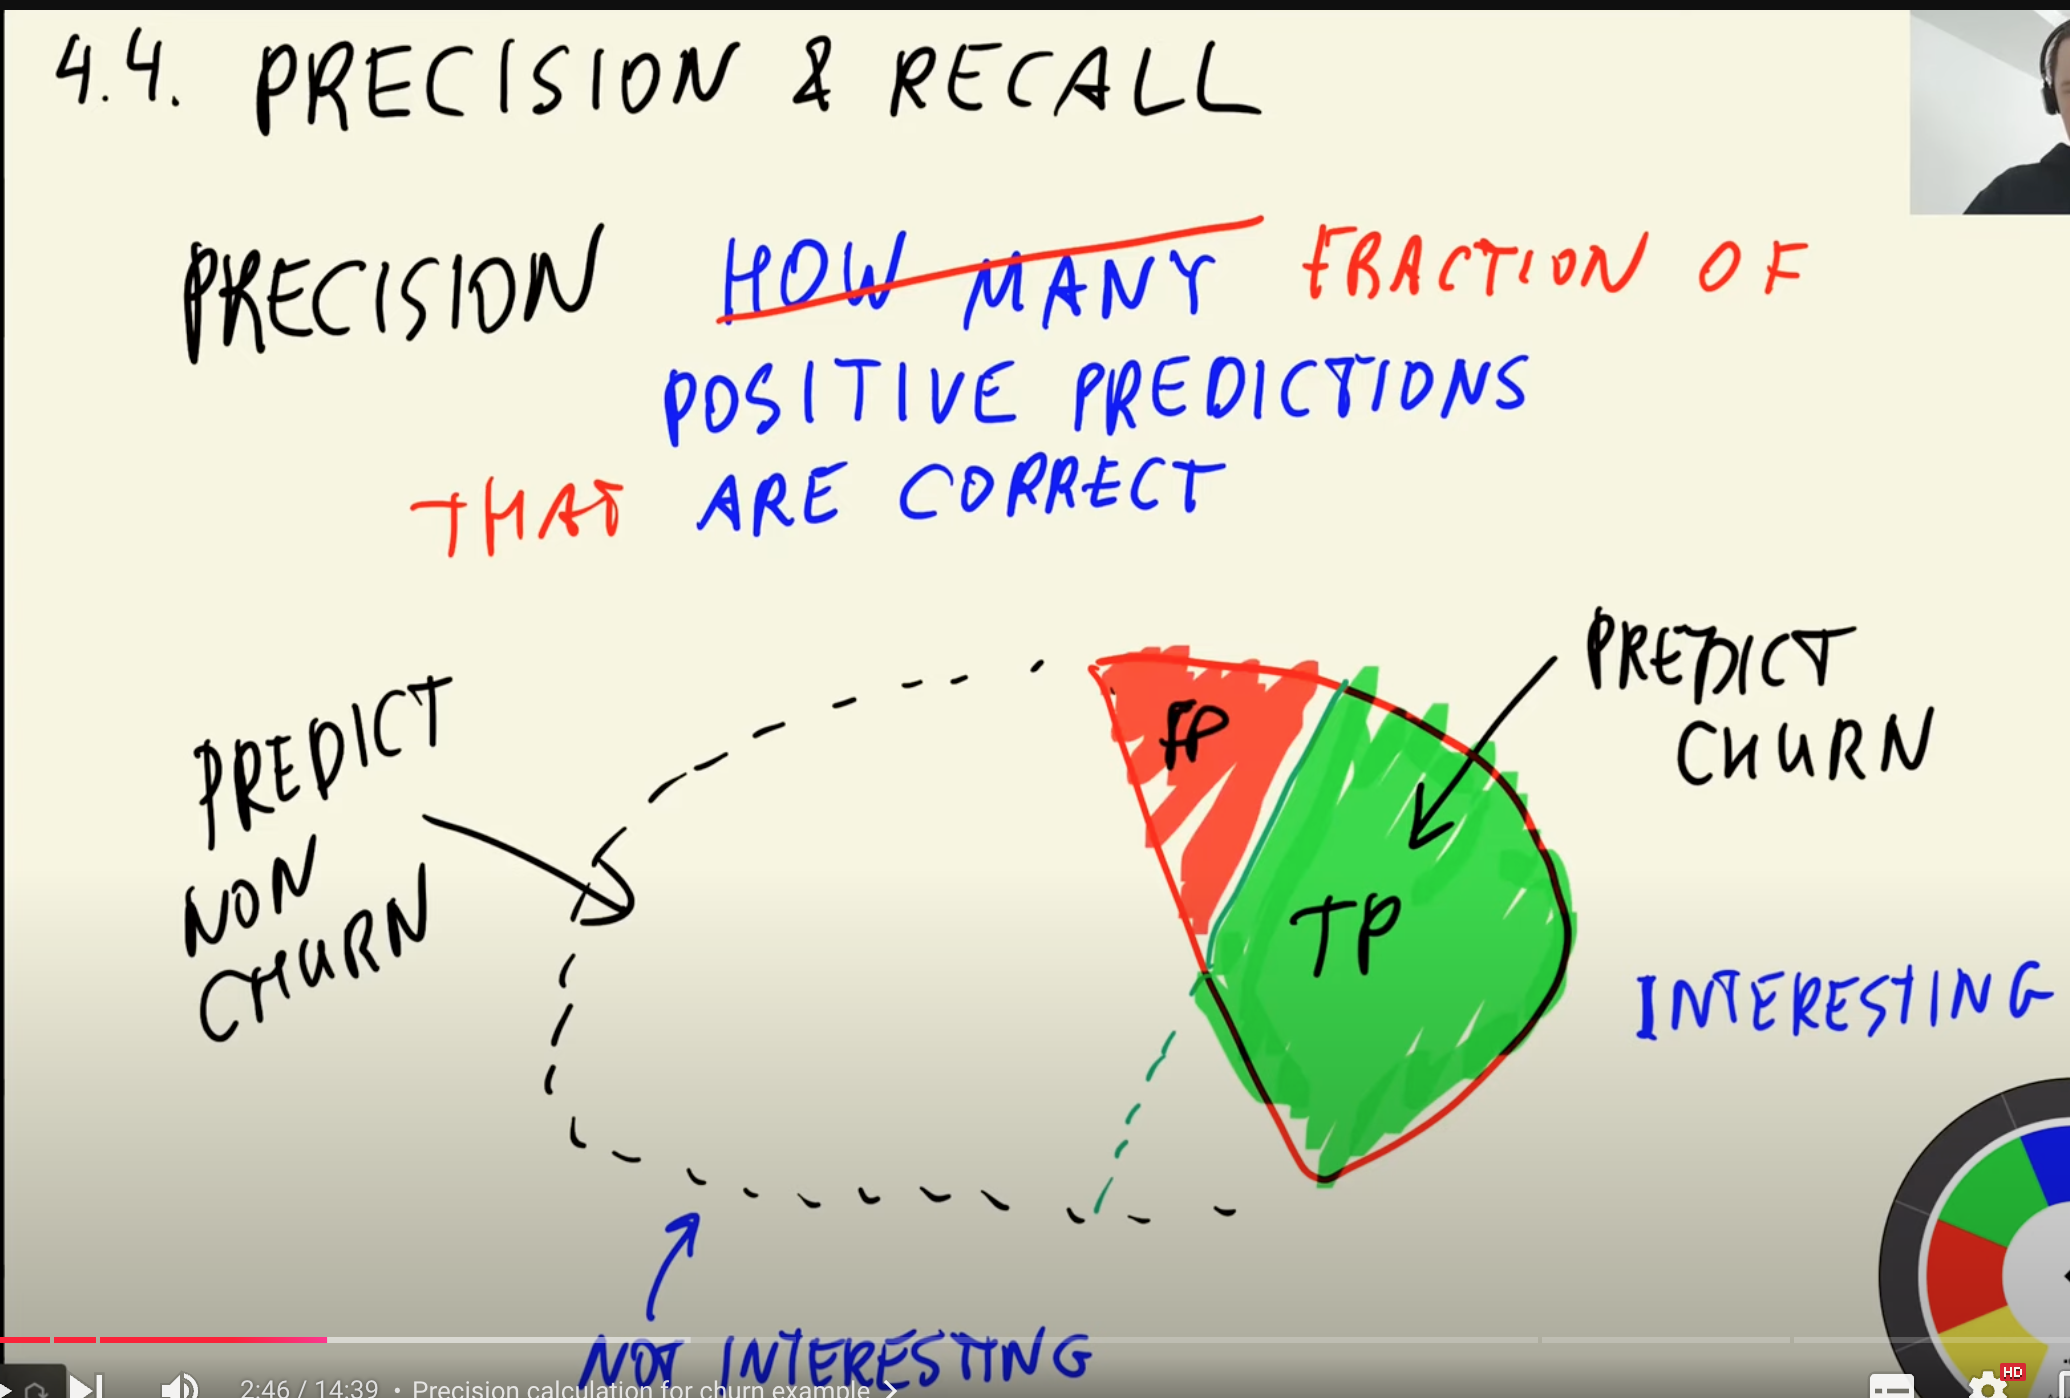 <br>


In [26]:
precision = true_positive/(true_positive+false_positive) #fraction of the positive preditions that are correct.
precision # Hence for all the customers for which our model says that they are churning only 67% of them actually churn. so this is churn precision. asin if I say that this person is churning then how precise is that

np.float64(0.6730769230769231)

<font color = 'red'> Recall </font>

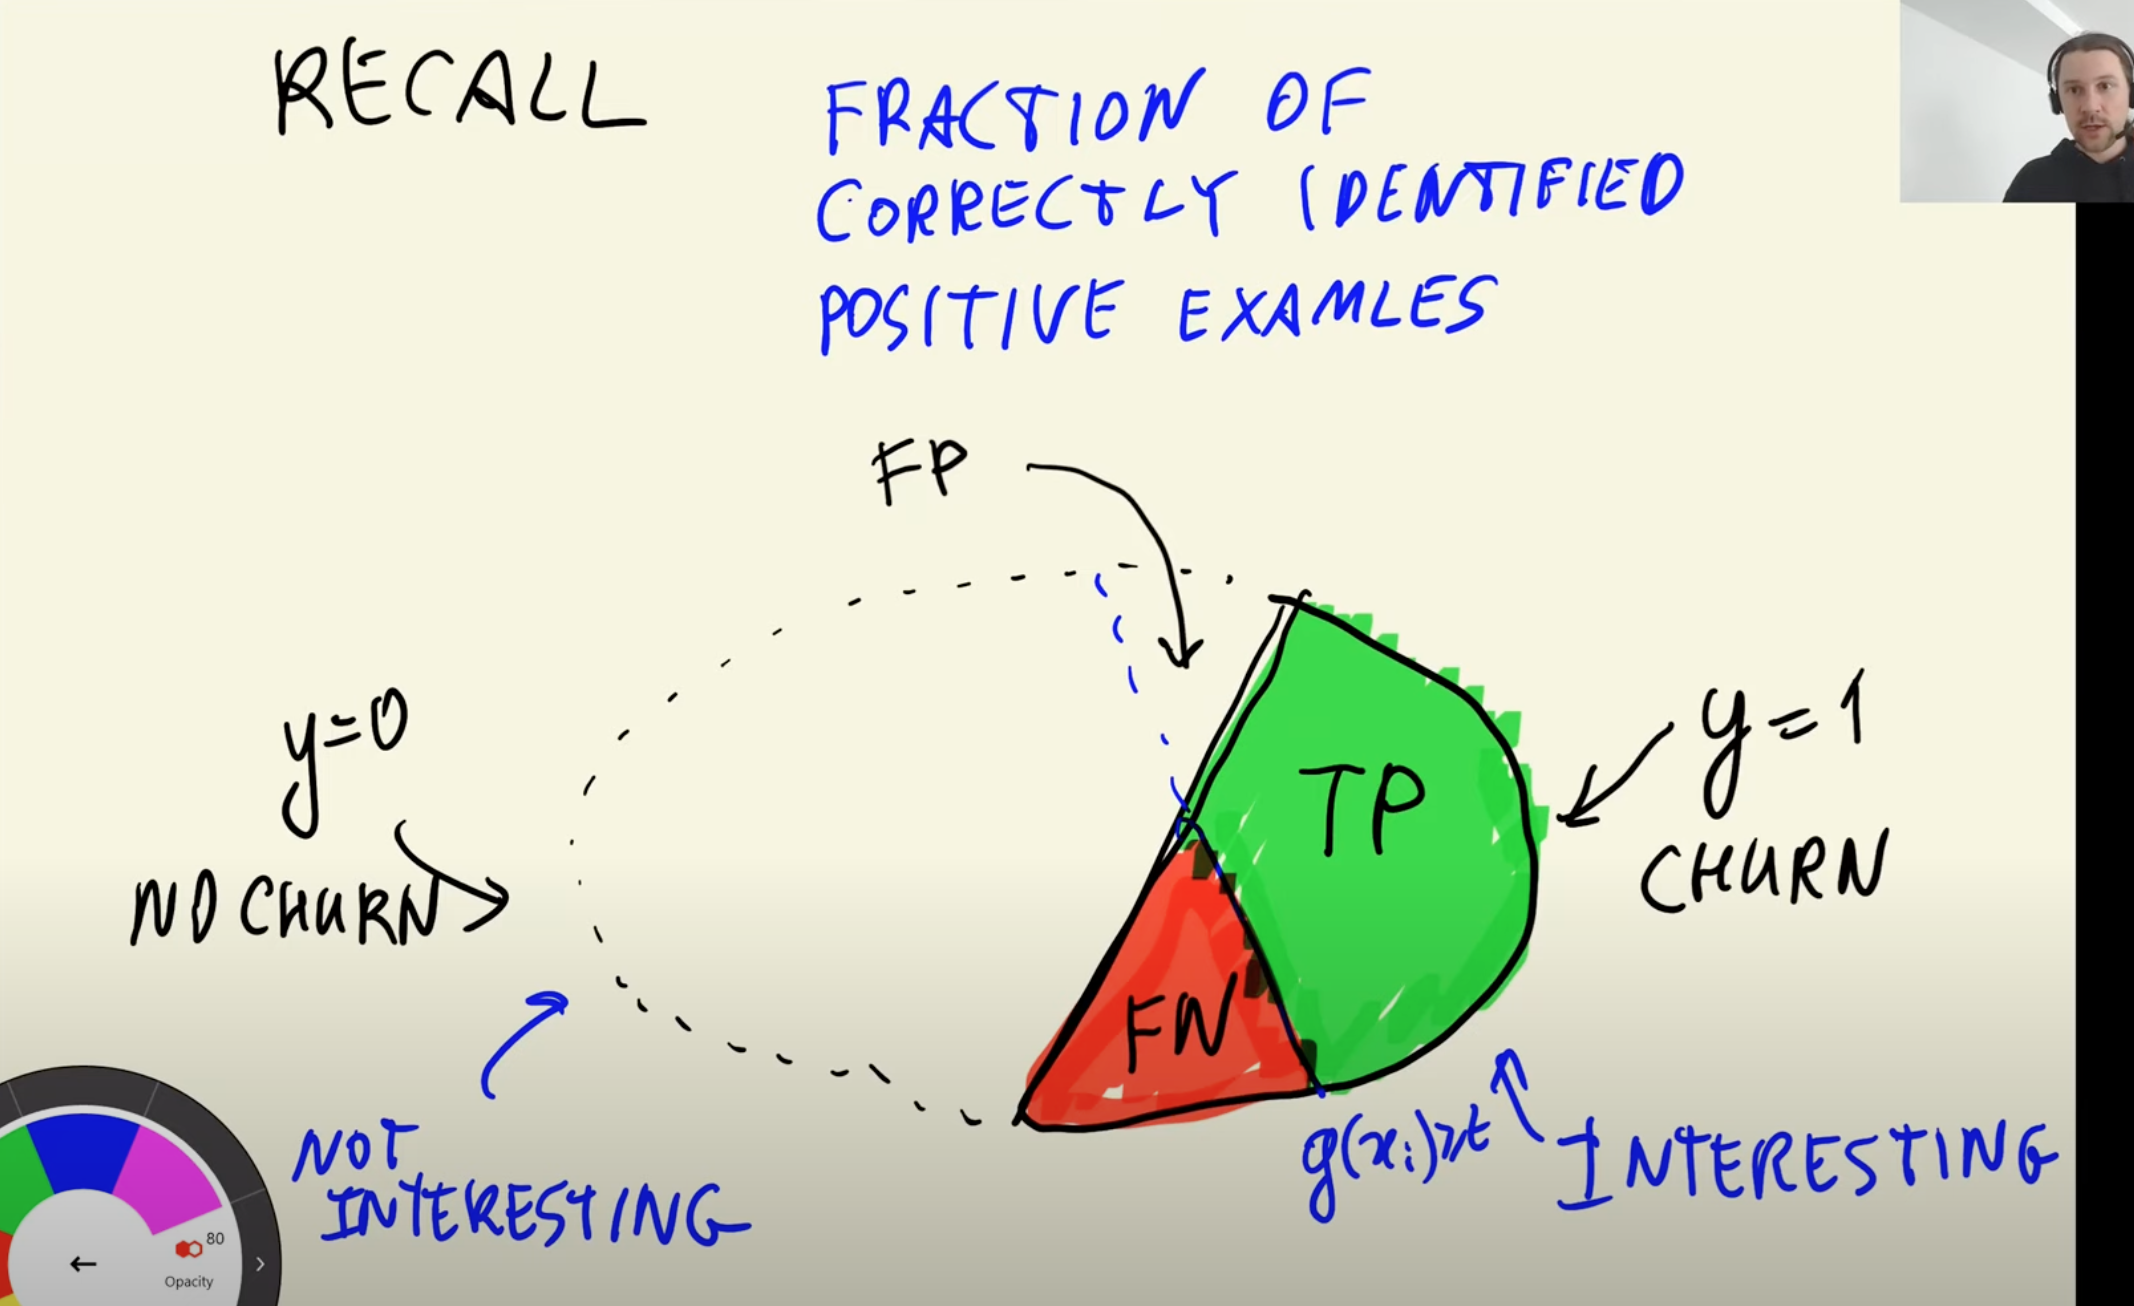

In [27]:
recall=true_positive/(true_positive+false_negative)

recall # Ie. we failed to identify 46% of the people that are churning

np.float64(0.5440414507772021)

Hence by lookin at accuracy we can say that our model is quite good but when we look at precision and recall we can say that our model is not that good <br>

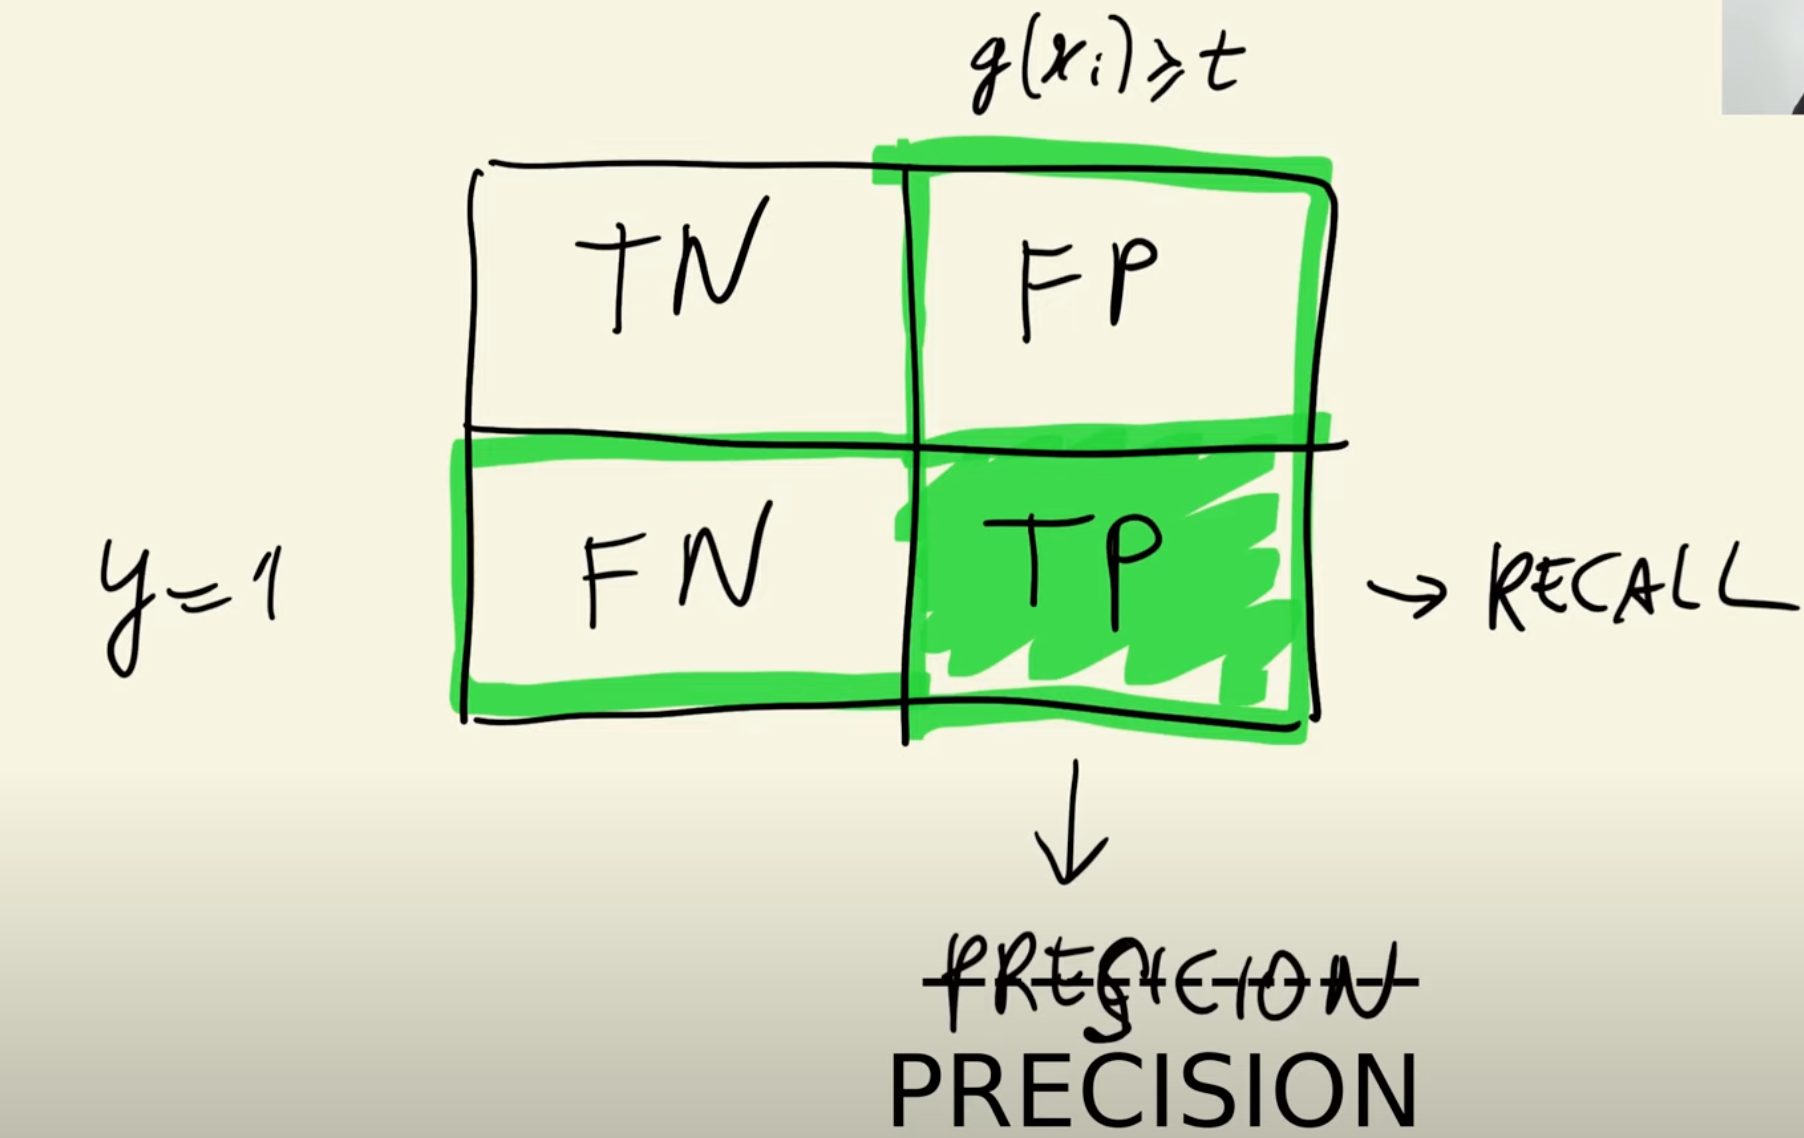




<b><font color ='red'><h4> ROC Curve (Receiver Operating Characteristics)</h4></font></b> <br>
Used to describe the performance of the binary execution model.<br>
😶 TPR(True positive rate - Fraction of true posities over total number of positive examples) and FPR (False positive Rate - Fraction of false positive among all negatives)<br>

We want to make the number of false postive make as small as possible and at the same time we want to make the number of true positives as big as possible.
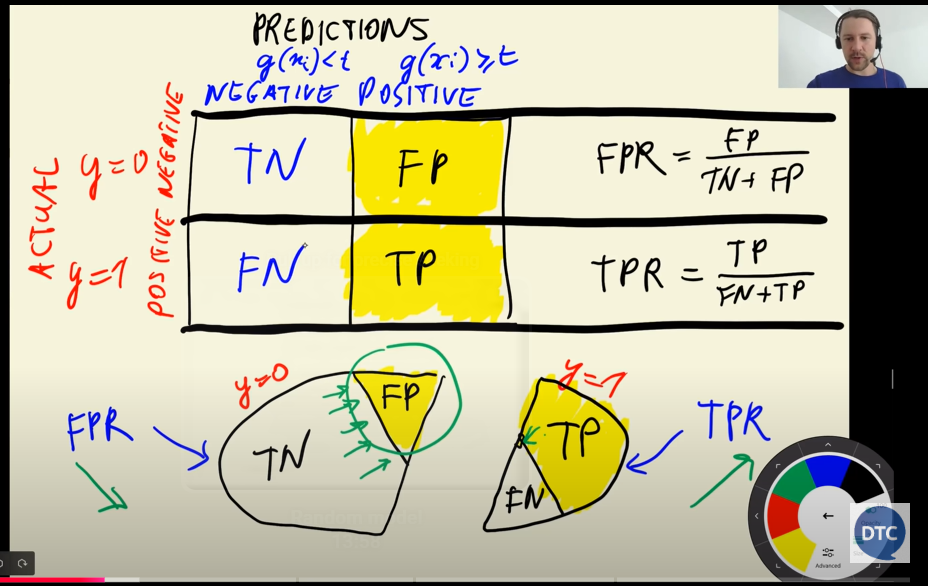

Roc Curves are based on these two values.

In [28]:
tpr = true_positive/(true_positive+false_negative)
fpr = false_positive/(false_positive+true_negative)

tpr,fpr,recall #wecan see that true positive rate is same as recall. and the FPR is around 10% so from all the negative examples 10% are still predicted incorrectly

(np.float64(0.5440414507772021),
 np.float64(0.09970674486803519),
 np.float64(0.5440414507772021))

Roc curve is based on these two values only but since these are calculated for one threshold in this case 0.5,while the roc curve is ploted when these are calcualted for all/many threshold.

In [29]:
threshold = np.linspace(0,1,101)
score=[]

for t in threshold:
    actual_positive = (y_val==1)
    actual_negative = (y_val==0)
    
    predict_positive = (y_pred>=t)
    predict_negative = (y_pred<t)
    
    true_positive = (actual_positive & predict_positive).sum()
    false_positive = (actual_negative & predict_positive).sum()
    
    true_negative = (actual_negative & predict_negative).sum()
    false_negative = (actual_positive & predict_negative).sum()
    
    score.append((t,true_positive,false_positive,false_negative,true_negative))
    
    

In [30]:
score # hence for different thresholds we got 101 confusiton matrixs

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(916), np.int64(1), np.int64(107)),
 (np.float64(0.02), np.int64(384), np.int64(831), np.int64(2), np.int64(192)),
 (np.float64(0.03), np.int64(383), np.int64(766), np.int64(3), np.int64(257)),
 (np.float64(0.04), np.int64(381), np.int64(715), np.int64(5), np.int64(308)),
 (np.float64(0.05), np.int64(379), np.int64(686), np.int64(7), np.int64(337)),
 (np.float64(0.06), np.int64(377), np.int64(661), np.int64(9), np.int64(362)),
 (np.float64(0.07), np.int64(372), np.int64(643), np.int64(14), np.int64(380)),
 (np.float64(0.08), np.int64(371), np.int64(615), np.int64(15), np.int64(408)),
 (np.float64(0.09), np.int64(369), np.int64(582), np.int64(17), np.int64(441)),
 (np.float64(0.1), np.int64(366), np.int64(556), np.int64(20), np.int64(467)),
 (np.float64(0.11), np.int64(365), np.int64(528), np.int64(21), np.int64(495)),
 (np.float64(0.12), np.int64(364), np.int64(512), 

In [31]:
df_score = pd.DataFrame(score,columns=['threshold','tp','fp','fn','tn'])
df_score

threshold   tp    fp   fn    tn
0         0.00  386  1023    0     0
1         0.01  385   916    1   107
2         0.02  384   831    2   192
3         0.03  383   766    3   257
4         0.04  381   715    5   308
..         ...  ...   ...  ...   ...
96        0.96    0     0  386  1023
97        0.97    0     0  386  1023
98        0.98    0     0  386  1023
99        0.99    0     0  386  1023
100       1.00    0     0  386  1023

[101 rows x 5 columns]

In [32]:
df_score[::10] # this move through the rows of the dataframe with increment of 10

threshold   tp    fp   fn    tn
0          0.0  386  1023    0     0
10         0.1  366   556   20   467
20         0.2  333   357   53   666
30         0.3  284   236  102   787
40         0.4  249   166  137   857
50         0.5  210   102  176   921
60         0.6  150    53  236   970
70         0.7   75    19  311  1004
80         0.8   12     1  374  1022
90         0.9    0     0  386  1023
100        1.0    0     0  386  1023

In [33]:
df_score['tpr'] = df_score.tp/(df_score.tp+df_score.fn)
df_score['fpr'] = df_score.fp/(df_score.fp+df_score.tn)
df_score[::10]

threshold   tp    fp   fn    tn       tpr       fpr
0          0.0  386  1023    0     0  1.000000  1.000000
10         0.1  366   556   20   467  0.948187  0.543500
20         0.2  333   357   53   666  0.862694  0.348974
30         0.3  284   236  102   787  0.735751  0.230694
40         0.4  249   166  137   857  0.645078  0.162268
50         0.5  210   102  176   921  0.544041  0.099707
60         0.6  150    53  236   970  0.388601  0.051808
70         0.7   75    19  311  1004  0.194301  0.018573
80         0.8   12     1  374  1022  0.031088  0.000978
90         0.9    0     0  386  1023  0.000000  0.000000
100        1.0    0     0  386  1023  0.000000  0.000000

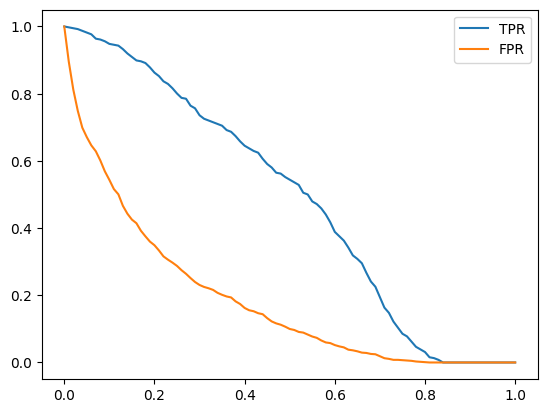

In [34]:
plt.plot(df_score.threshold,df_score.tpr,label = 'TPR')
plt.plot(df_score.threshold,df_score.fpr, label = 'FPR')
plt.legend()

we look at at threshold = 0 means we predict that everyone is churing hence the Tpr is 1 since we predict correctly for the churning customers and the fpr is also one that for all the non churning ones we predict that they are churning.<br>

as we increase the threshold the red one that we have to minimize drops at a higher rate. so both of them drop but the red one drop with high rate initially.

Now we can get an idea about our classifier. Also by looking at the graph we can also see that for threshold of 0.5 how many mistakes of each type we make.<br>

<font color='orange'> Now this plot does not give us enough insights because we do not have anything else to compare it to.<br> so what we want to do now is to have a base model that is <b><u>Random</u></b> where we flip a coin for each customer to decide if that is churning or not </font>

<font color = 'red'> Random Model </font>


In [35]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size = len(y_val)) # to get the random score for each customer. the score in this case has unifrom distribution.
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [36]:
# the accuracy for this model should be bad and since it is uniform distribution so if we use the threshold as 0.5 then almost 50% should be churning and 50% non churning.
print((y_rand>=0.5).sum()/len(y_val))

# lets compare it with our model to see the accuracy.

((y_rand>=0.5)==y_val).mean() # hence just by luck it got 50% of them correctly.


0.511000709723208


np.float64(0.5017743080198722)

In [37]:
# now we will plot the tpr and fpr for this model so for that lets just write a function that will take the values and will give out theplot

def tpr_fpr_dataframe(y_val,y_pred):
    
    threshold = np.linspace(0,1,101)
    score=[]

    for t in threshold:
        actual_positive = (y_val==1)
        actual_negative = (y_val==0)

        predict_positive = (y_pred>=t)
        predict_negative = (y_pred<t)

        true_positive = (actual_positive & predict_positive).sum()
        false_positive = (actual_negative & predict_positive).sum()

        true_negative = (actual_negative & predict_negative).sum()
        false_negative = (actual_positive & predict_negative).sum()

        score.append((t,true_positive,false_positive,false_negative,true_negative))


    df_score = pd.DataFrame(score,columns=['threshold','tp','fp','fn','tn'])
    df_score['tpr'] = df_score.tp/(df_score.tp+df_score.fn)
    df_score['fpr'] = df_score.fp/(df_score.fp+df_score.tn)

    return df_score


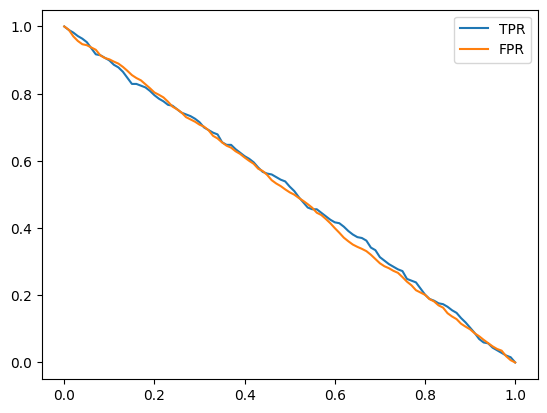

In [38]:
df_rand = tpr_fpr_dataframe(y_val,y_rand)

plt.plot(df_rand.threshold,df_rand.tpr,label = 'TPR')
plt.plot(df_rand.threshold,df_rand.fpr, label = 'FPR')
plt.legend()

It is almost a straight line where both are decreasing. lets take a look at the value for 0.6 threshold and the value for tpr and fpr is same that is 0.4 and the reason for that is because we are throwing a coin. Now our threshold is 0.6 hence in 60% of the case this model predict that the customer is not churning and in 40% of the case is predict that this customer is churning. 

Now lets lalk about a different model

<font color = 'red'> Ideal Model </font>

we want to consider an ideal model. where we have prediciton for the customers and what I want to do now is tha arrange these prediction score in increasing order. so at a particular score we see that before that score all the customers are non churning and after that score are churning.<br>
and we take the same threshold to classify then our model will be 100% accurate as it will give each churning customer as churning and each non-churning one as non-churning.
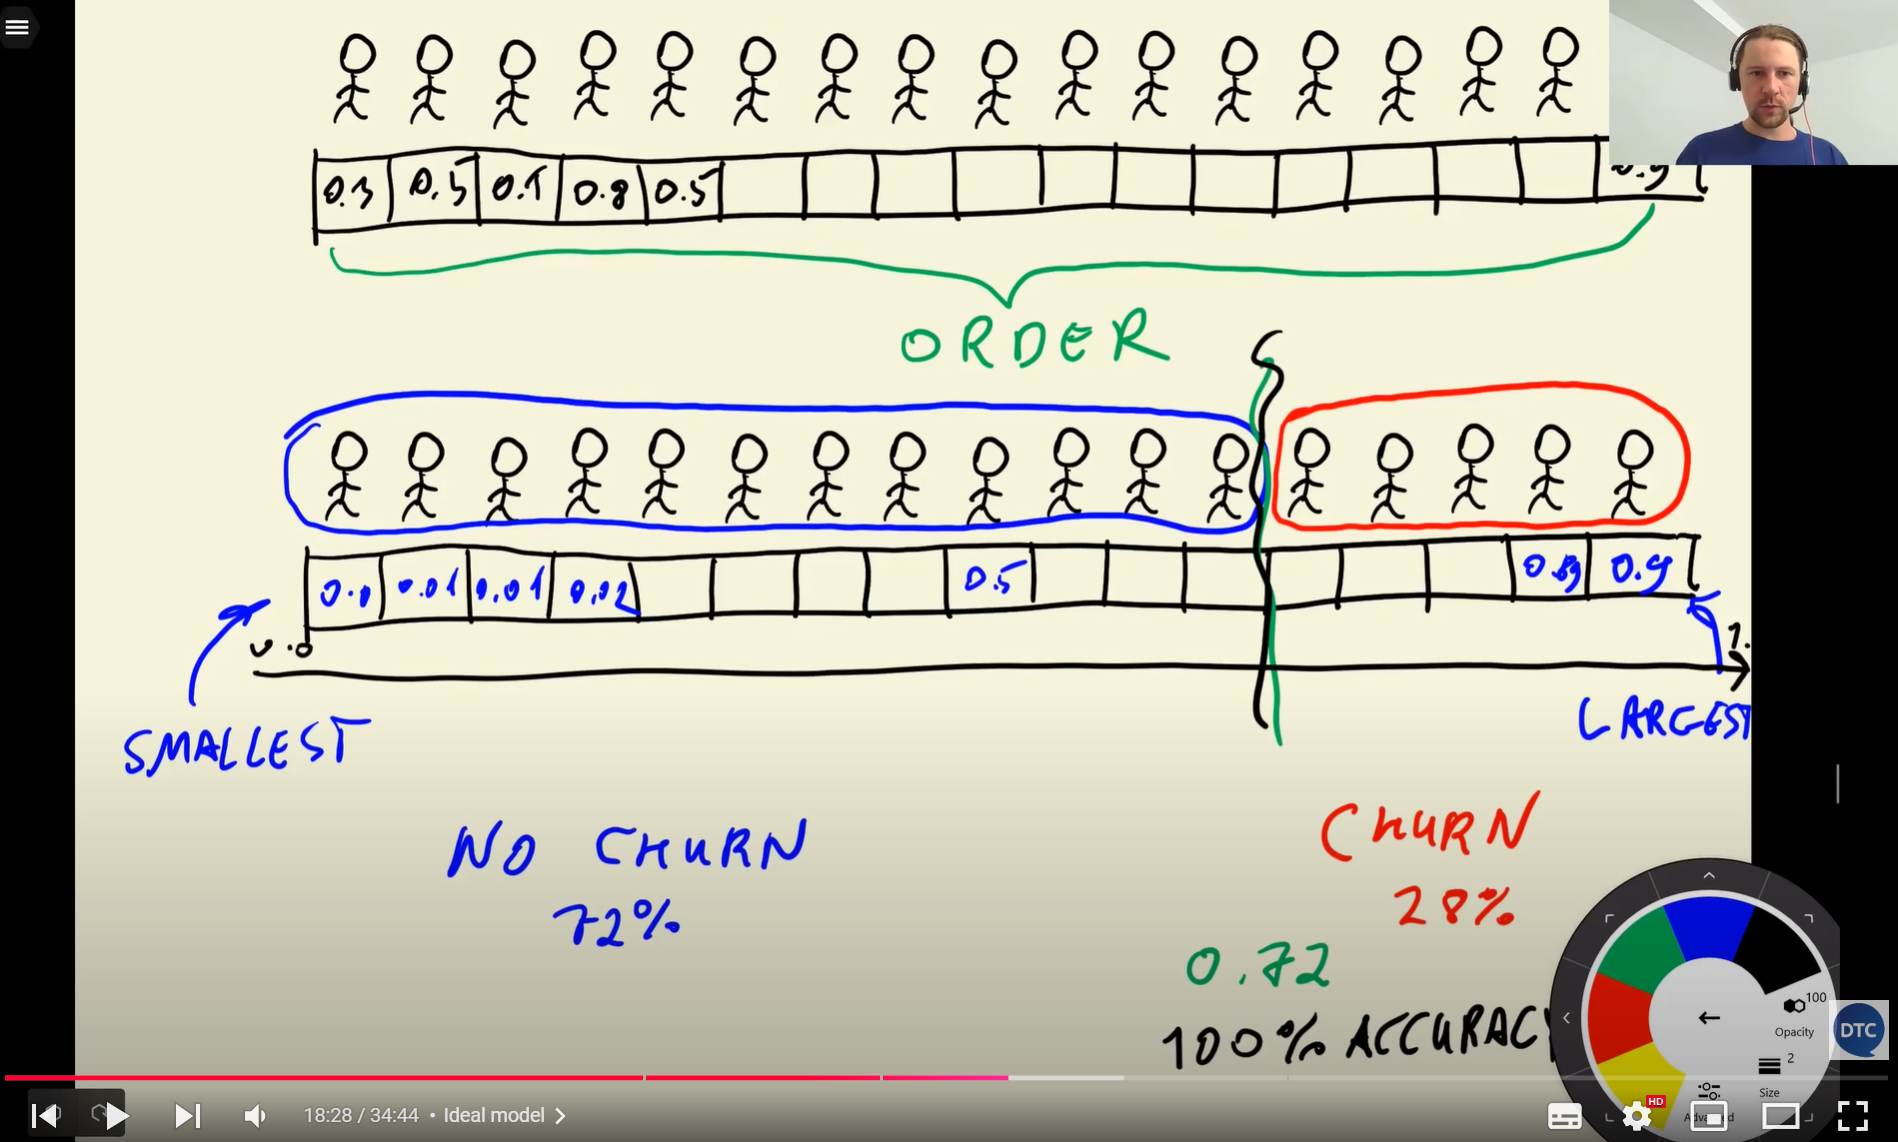

In [39]:
num_neg = (y_val == 0).sum() # number of customers that are non churning
num_pos = (y_val == 1).sum() # number of customers that are churning
num_neg,num_pos

(np.int64(1023), np.int64(386))

In [ ]:
#now lets create our ideal target values that we have got 

y_ideal = np.repeat([0,1], [num_neg, num_pos]) # this will create list that has the first elemnet as num_neg number of time and second element that is 1 num_pos numebr of times
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Now lets create ideal predicted target variable that has score between 0 and 1

y_ideal_pred = np.linspace(0,1,len(y_val))


In [42]:
# now lets check the accuracy
((y_ideal_pred >= 0.725)==y_ideal).mean()

np.float64(0.9985805535841022)

In [43]:
#The actual threshold that can give 100 percent accuracy is the fraction of 0s in y_val since the space between 0 and 1 divided in len(y_val) and ones i.e when the cusotmers
#are actually churning start to appear in y_ideal after that number.

((y_ideal_pred >= (num_neg/len(y_val)))==y_ideal).mean()

np.float64(1.0)

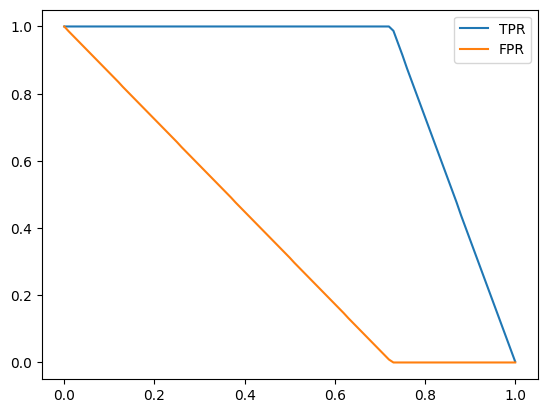

In [44]:
#now this will help us to benchmark and lets repeat the same above excercise that we did for random model.C

df_ideal=tpr_fpr_dataframe(y_ideal,y_ideal_pred)

plt.plot(df_ideal.threshold,df_ideal.tpr,label = 'TPR')
plt.plot(df_ideal.threshold,df_ideal.fpr, label = 'FPR')
plt.legend()

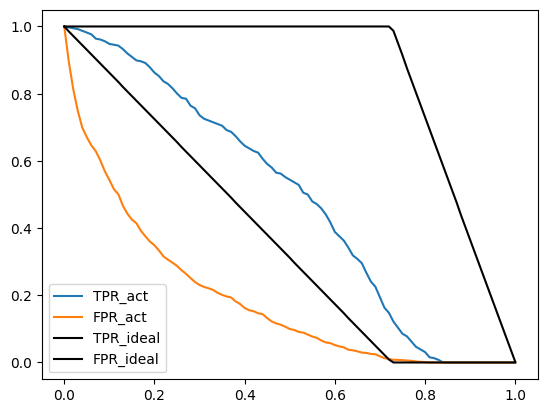

In [48]:
#now we can plot all the models together.

plt.plot(df_score.threshold,df_score.tpr,label = 'TPR_act')
plt.plot(df_score.threshold,df_score.fpr, label = 'FPR_act')

# plt.plot(df_rand.threshold,df_rand.tpr,label = 'TPR_rand')
# plt.plot(df_rand.threshold,df_rand.fpr, label = 'FPR_rand')

plt.plot(df_ideal.threshold,df_ideal.tpr,label = 'TPR_ideal',color='black')
plt.plot(df_ideal.threshold,df_ideal.fpr, label = 'FPR_ideal', color = 'black')

plt.legend()

we want out acutual TPR and FPR to be very close to the ideal ones. Also comparing at threshold is not intutive as in our case the best threshold is 0.5 while that in case of ideal 0.726<br>

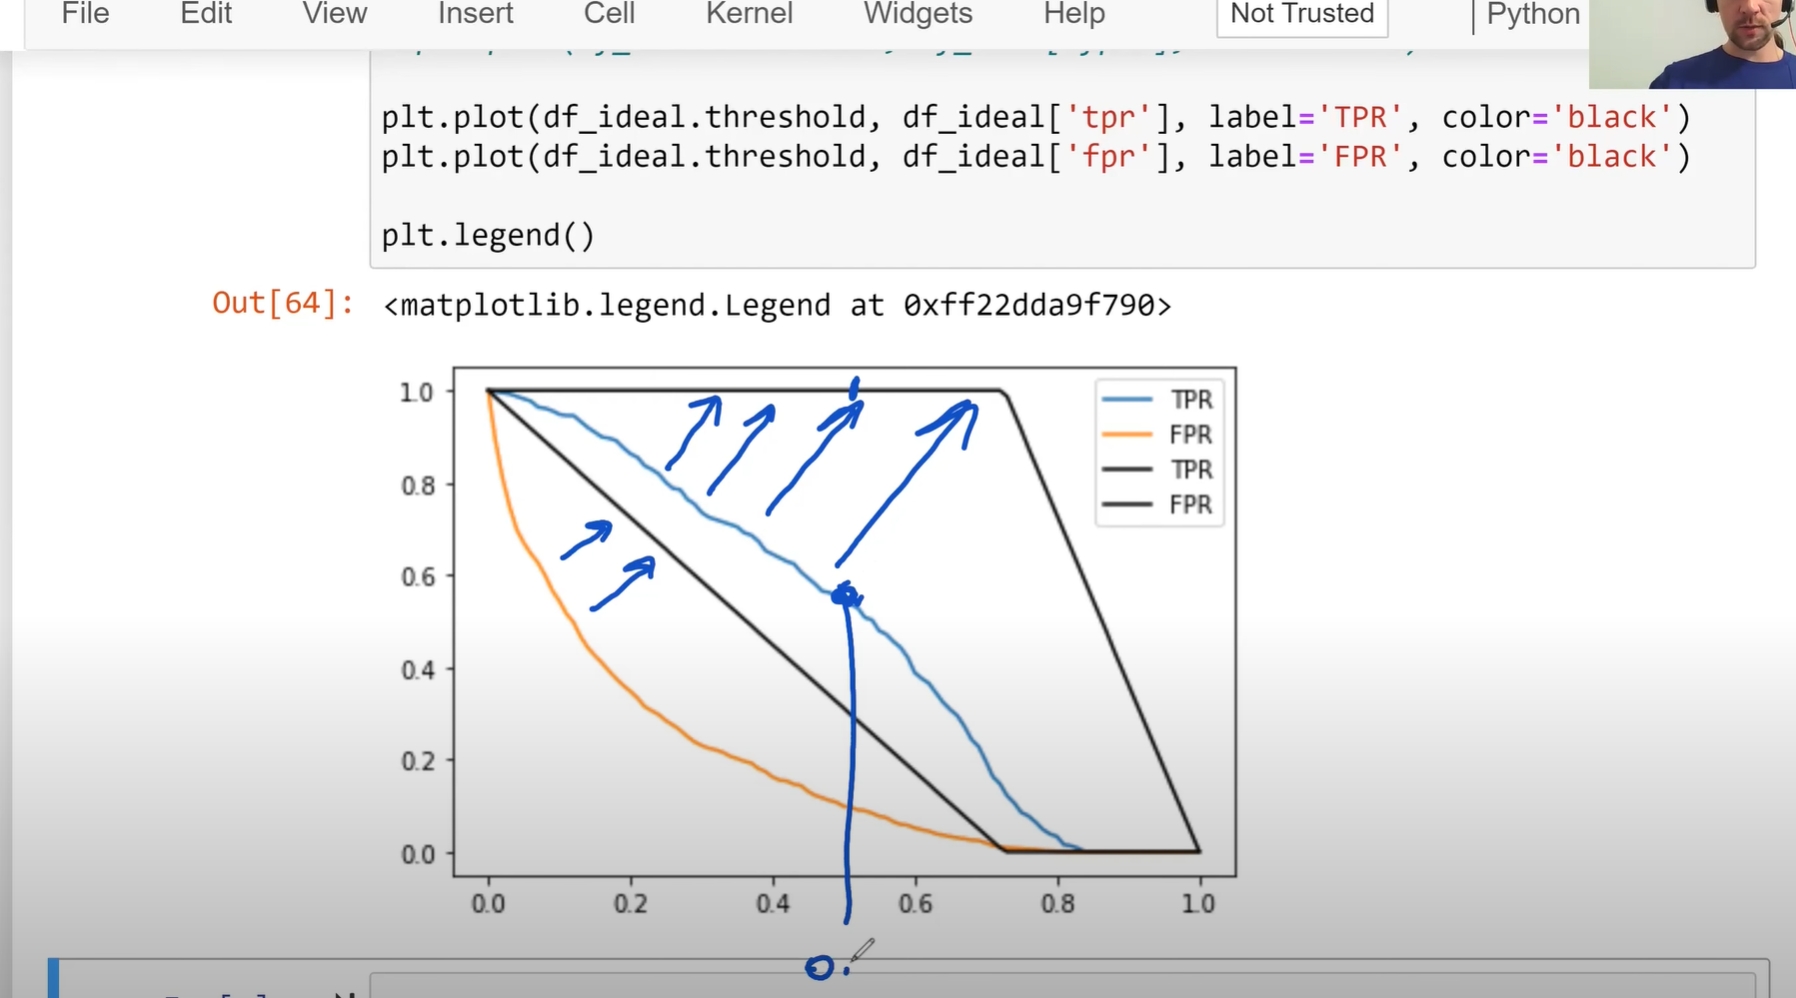

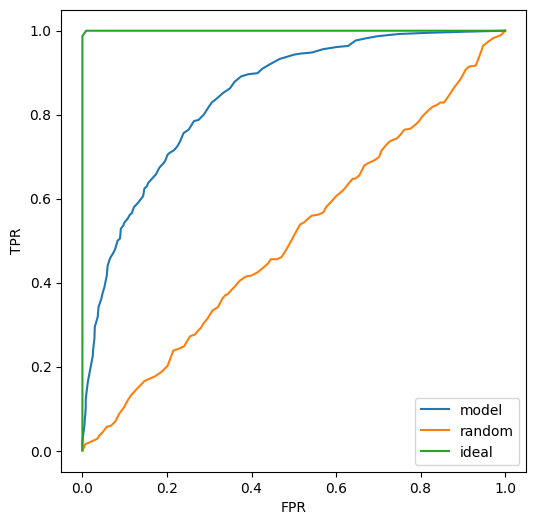

In [58]:
#Now what we can do now is that we can plot true positive rate against false positive rate insted of thereshold

# Usually roc curves are squares so we need to fix the size
plt.figure(figsize=(6,6))

plt.plot(df_score.fpr,df_score.tpr,label = 'model')
plt.plot(df_rand.fpr,df_rand.tpr, label = 'random')
plt.plot(df_ideal.fpr,df_ideal.tpr, label = 'ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()